# Selection Sort Experimentation

## Executive Summary

We've generated random data for this assignment of five data arrays of length 5,000, 10,000, 15,000, 20,000, and 25,000 (uniformly distributed random ints, floats, and stinrgs).  A random number seed was used for reproducable results. In this experiment, we've performed a time comparison of the 5 different array lengths utilizing an algorithm called the "Selection Sort." The Selection Sort is a part the class of sorting algorithms that make repeated comparisons to sort the array (contrasted with counting sorting methods). The selection sort runs in $O(n^2)$ time because it has to make a comparison between every item and every other item to determine the sorted order.  The selection sort quickly becomes an intractable method to use for sorting arrays larger than 30k elements. Even at 5,000 elements, which by computer standards is relatively small - the selection sort takes ~9 seconds to complete. This method given its limitations is highly restrictive in its general operability for quick personal use, let alone enterprise use!

High Level Results of the Selection Sort Experiment for integers:

| Array Size  | Selection Sort Computation Time  |   |   |   |
|---|---|---|---|---|
|5k   | ~9 seconds  |   |   |   |
| 10k  |  ~35 seconds |   |   |   |
| 15k  | ~79 seconds  |   |   |   |
| 20k  | ~141 seconds  |   |   |   |
| 25k  | ~222 seconds  |   |   |   |


In [4]:
import numpy as np
import pandas as pd
import time
import string
import random
import matplotlib.pyplot as plt


plt.style.use('bmh')
np.random.seed = 34 #set seed
LOG = {} # Define Log

#Define Data
n = 1000
int_1 = np.random.randint(0,10000, 5*n)
int_2 = np.random.randint(0,10000, 10*n)
int_3 = np.random.randint(0,10000, 15*n)
int_4 = np.random.randint(0,10000, 20*n)
int_5 = np.random.randint(0,10000, 25*n)

float_1 = np.random.uniform(0,10000, 5*n)
float_2 = np.random.uniform(0,10000, 10*n)
float_3 = np.random.uniform(0,10000, 15*n)
float_4 = np.random.uniform(0,10000, 20*n)
float_5 = np.random.uniform(0,10000, 25*n)

string_1 = [''.join(random.choices(string.ascii_letters, k = 15)) for _ in range(5*n)]
string_2 = [''.join(random.choices(string.ascii_letters, k = 15)) for _ in range(10*n)]
string_3 = [''.join(random.choices(string.ascii_letters, k = 15)) for _ in range(15*n)]
string_4 = [''.join(random.choices(string.ascii_letters, k = 15)) for _ in range(20*n)]
string_5 = [''.join(random.choices(string.ascii_letters, k = 15)) for _ in range(25*n)]

#Setting up the different sets of arrays we created 
string_arrays = [string_1, string_2, string_3, string_4, string_5] #Raw data
int_arrays = [int_1, int_2, int_3, int_4, int_5] #Raw data
float_arrays = [float_1, float_2, float_3, float_4, float_5] #Raw data

## Timing Mechanism
- The timing mechanism used in this experiment wraps functions and times their overall time to return function output. 
- A dictionary "LOG" is updated with the output times of the functions

In [5]:
def timeit(log):
    """ Wraps functions needing timing provided a dictionary to dump into based on function name"""
    def log_it(func):
        def wrapped(*args, **kw):
            ts = time.time_ns() // 1000000 
            result = func(*args, **kw)
            te = time.time_ns() // 1000000 
            if func.__name__ in log.keys():
                log[func.__name__].append(te-ts)
            else:
                log[func.__name__] = [te-ts]
            return result
        return wrapped
    return log_it

## Selection Sort Algorithm

The selection sort is a comparison type sort that operates in $O(n^2)$ time complexity. It iterates through the array checking for the smallest element and then replacing that smallest element to the front of the array. The algorithm repeats with the scope of the array shortened by one element (the first smallest detected element). The algorithm will repeat until there are no elements smaller than the last smallest element indicating the sort has completed. The reason this takes $n^2$ time is because the algorithm will go through n^2 iterations for the largest element in the list, and at least one iteration for even the smallest elements. This algorithm could be implemented recursively. 

In [6]:
@timeit(LOG)
def selection_sort(arr: list) -> list:
    """
    Returns a sorted array in O(n^2) time
    ----------
        arr : list, array
            the array to sort
    """
    for i in range(0, len(arr)-1):
        small = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[small]:
                small = j
        temp_i = arr[i]
        arr[i] = arr[small]
        arr[small] = temp_i
    return arr
    


## Quick Sort Algorithm
As a comparison, I've optimized the quick sort algoirthm so that random pivots are used, greatly improving the average case. This algorithm is a good contrast to the selection sort as its average case is $O(n$ $log$ $n )$ but in the worst case it is the same as the selection sort $O(n^2)$.


In [7]:
@timeit(LOG)
def total_qsort(arr):
    def qsort(arr):
        """
        Returns a sorted array. Time-complexity = O(n log n)
        Parameters
        ----------
            arr : list, array
                the array to sort
        """
        #Base case  (already sorted)
        if len(arr) < 2:
            return arr
        #Recursive case
        else:
            pivot = arr[np.random.randint(0,len(arr))]
            less = [i for i in arr[1:] if i <= pivot]
            greater = [i for i in arr[1:] if i > pivot]
            return qsort(less) + [pivot] + qsort(greater)
    return qsort(arr)

## Python's native sorting method ("Timsort")
Python's native sorting method deploys an assessment of the array prior to determining the right algorithm to use. If the number of elements is < 64, it deploys the Insertion sort algorithm which is technically a $O(n^2)$ but is very fast for small arrays. When the array is larger it deploys a method similar to merge sort which is an algorithm we have yet to explore, but operates similarly to quick sort in $O(n log n)$

In [ ]:
@timeit(LOG)
def native_sort(arr):
    return sorted(arr)

## Executing Sorting Time Experiment 

In [20]:
#Trials of experiment
trials = 1 

### Selection sort will be deployed on each integer, float, and string array sets.
Size of arrays: 5000, 10000, 15000, 20000, 25000

In [10]:
for each_array in int_arrays:
    for trial in range(trials):
        s_a = selection_sort(each_array)

for each_array in float_arrays:
    for trial in range(trials):
        s_a = selection_sort(each_array)
    
for each_array in string_arrays:
    for trial in range(trials):
        s_a = selection_sort(each_array)


### Python's native sort will be deployed on each integer, float, and string array sets.
Size of arrays: 5000, 10000, 15000, 20000, 25000

In [11]:
for each_array in int_arrays:
    for trial in range(trials):
        s_a = native_sort(each_array)
    
for each_array in float_arrays:
    for trial in range(trials):
        s_a = native_sort(each_array)

for each_array in string_arrays:
    for trial in range(trials):
        s_a = native_sort(each_array)

### Quick Sort will be deployed on each integer, float, and string array sets.
Size of arrays: 5000, 10000, 15000, 20000, 25000

In [12]:
for each_array in int_arrays:
    for trial in range(trials):
        s_a = total_qsort(each_array)
    
for each_array in float_arrays:
    for trial in range(trials):
        s_a = total_qsort(each_array)

for each_array in string_arrays:
    for trial in range(trials):
        s_a = total_qsort(each_array)

## Results

The results show that selection sort exponentially increases in proportion to the increasing array size. In this experiment, the array size increased from 5000 to 10000 while the computation time increased from ~9000 to ~35000. Said otherwise, as the array sized doubled, the computation time nearly quadrupled. 

Interestingly, the 15 character length randomized strings take much less computation time compared to their integer and float counterparts, although still exponential. 

In [17]:
df = pd.DataFrame({
    'array_length':list(map(len, int_arrays)),
    'int_log':LOG['selection_sort'][:5], 
    'float_log':LOG['selection_sort'][5:10], 
    'string_log':LOG['selection_sort'][10:15],
    'nint_log':LOG['native_sort'][:5], 
    'nfloat_log':LOG['native_sort'][5:10], 
    'nstring_log':LOG['native_sort'][10:15],
    'qint_log':LOG['total_qsort'][:5], 
    'qfloat_log':LOG['total_qsort'][5:10], 
    'qstring_log':LOG['total_qsort'][10:15]
})

In [22]:
df

,array_length,int_log,float_log,string_log,nint_log,nfloat_log,nstring_log,qint_log,qfloat_log,qstring_log
0,5000,9026,9136,2850,0,0,0,74,54,67
1,10000,35388,36498,12016,1,0,0,121,112,113
2,15000,79710,80571,26399,0,3,0,188,151,162
3,20000,141752,142144,47161,3,4,0,238,187,201
4,25000,222014,219026,74347,0,4,5,315,300,275


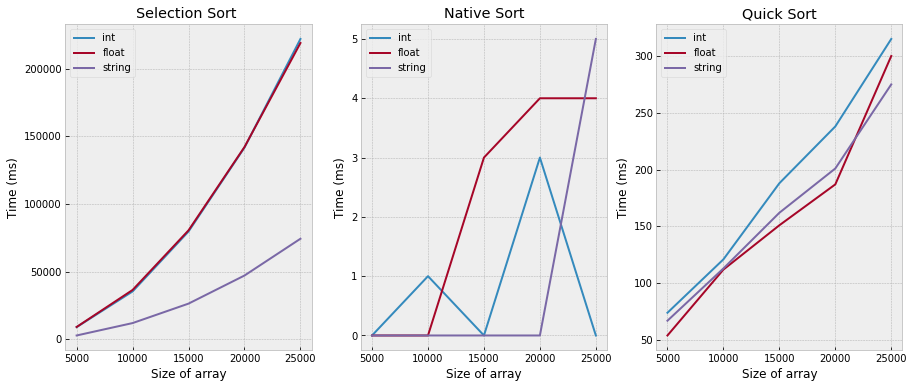

In [24]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
ax1,ax2,ax3 = axes.flatten()

ax1.plot(df['array_length'], df['int_log'], label = 'int')
ax1.plot(df['array_length'], df['float_log'], label = 'float')
ax1.plot(df['array_length'], df['string_log'], label = 'string')
ax1.set_title('Selection Sort ')
ax1.set_xlabel('Size of array')
ax1.set_ylabel('Time (ms)')
ax1.legend()

ax2.plot(df['array_length'], df['nint_log'], label = 'int')
ax2.plot(df['array_length'], df['nfloat_log'], label = 'float')
ax2.plot(df['array_length'], df['nstring_log'], label = 'string')
ax2.set_title('Native Sort')
ax2.set_xlabel('Size of array')
ax2.set_ylabel('Time (ms)')
ax2.legend()

ax3.plot(df['array_length'], df['qint_log'], label = 'int')
ax3.plot(df['array_length'], df['qfloat_log'], label = 'float')
ax3.plot(df['array_length'], df['qstring_log'], label = 'string')
ax3.set_title('Quick Sort')
ax3.set_xlabel('Size of array')
ax3.set_ylabel('Time (ms)')
ax3.legend()